In [1]:
import google.generativeai as genai
from google.generativeai import types

# for models in genai.list_tuned_models():
#   print(models)

/home/suga/Desktop/Work/learn/local-mcp/py-mcp-server/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
for models in genai.list_tuned_models():
  print(models)

TunedModel(name='tunedModels/generate-num-7042',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='This is my model.',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2025, 5, 30, 7, 4, 9, 707914, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 30, 7, 20, 41, 191469, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 30, 7, 4, 9, 787495, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2025, 5, 30, 7, 20, 41, 191469, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                        

In [3]:
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# The scopes required for tuning and model management
SCOPES = [
    "https://www.googleapis.com/auth/cloud-platform",
    "https://www.googleapis.com/auth/generative-language.tuning"
]

# Run the OAuth flow
flow = InstalledAppFlow.from_client_secrets_file(
    '/home/suga/Desktop/Work/learn/machinelearning/client_secret.json',  # Path to your downloaded OAuth credentials
    scopes=SCOPES
)
credentials = flow.run_local_server(port=0)

# Configure genai with OAuth credentials
genai.configure(credentials=credentials)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=288812625767-2vutudg5912lkdbb3k3r82io4aah641n.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A43055%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=enQa0DOcPVH3yZBp2xmwF0lz9pAkLr&access_type=offline


In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and "flash" in m.name
    ][0]
base_model

In [ ]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [6]:

model = genai.get_tuned_model(f'tunedModels/{name}')

model
     

TunedModel(name='tunedModels/generate-num-7042',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 5, 30, 7, 4, 9, 707914, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 30, 7, 4, 9, 707914, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 30, 7, 4, 9, 787495, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learn

In [7]:
model.state

<State.CREATING: 1>

In [8]:
operation.metadata

total_steps: 375
tuned_model: "tunedModels/generate-num-7042"

In [9]:
import time
for status in operation.wait_bar():
    time.sleep(5)


100%|██████████| 375/375 [10:35<00:00,  1.69s/it]


<Axes: xlabel='epoch', ylabel='mean_loss'>

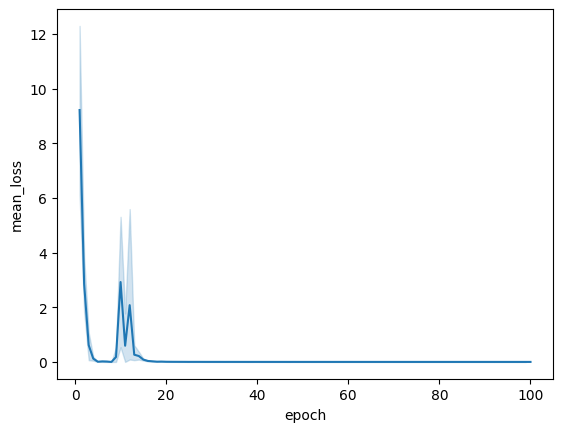

In [10]:

import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [11]:

model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [12]:
result = model.generate_content('55')
result.text

'56'

In [14]:

genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."})

TunedModel(name=None,
           source_model=None,
           base_model=None,
           display_name='',
           description='This is my model.',
           temperature=None,
           top_p=None,
           top_k=None,
           state=<State.STATE_UNSPECIFIED: 0>,
           create_time=None,
           update_time=None,
           tuning_task=None,
           reader_project_numbers=None)

In [15]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

In [ ]:

# genai.delete_tuned_model(f'tunedModels/{name}')

In [25]:
import pandas as pd

df = pd.read_csv('./santa-finetune-dataset.csv', delimiter='|', on_bad_lines='warn')

training_data_santa = [
    {'text_input': row['input'], 'output': row['output']}
    for _, row in df.iterrows()
]
print(len(training_data_santa))

33


In [26]:
santaname = f'santapocket-assistant-001'
operationsanta = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=training_data_santa,
    id = santaname,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [27]:
santamodel = genai.get_tuned_model(f'tunedModels/{santaname}')

santamodel

TunedModel(name='tunedModels/santapocket-assistant-001',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 5, 30, 7, 55, 52, 800910, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 30, 7, 58, 56, 297990, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 30, 7, 55, 53, 879105, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                      

In [28]:
operationsanta.metadata

total_steps: 825
tuned_model: "tunedModels/santapocket-assistant-001"

In [33]:
santamodel.state

<State.CREATING: 1>

In [30]:
for status in operationsanta.wait_bar():
    time.sleep(5)

100%|██████████| 825/825 [37:07<00:00,  2.70s/it]


In [34]:
model = genai.GenerativeModel(model_name=f'tunedModels/{santaname}')

In [ ]:
result = model.generate_content('santapocket là gì')
result.text

'Để nạp tiền vào ví SantaPocket qua Momo, người dùng có thể thực hiện theo các bước sau: 1. Mở ứng dụng Momo, chọn “Chuyển tiền”. 2. Nhập số điện thoại người nhận (theo cú pháp: 0974.xxxx.xxxx) → Nhập số tiền → Chọn “Tiếp tục”. 3. Kiểm tra thông tin thanh toán → Chọn phương thức thanh toán → Chọn “Xác nhận”. 4. Nhập mã OTP → Hoàn thành nạp tiền. Lưu ý: Người dùng cần đăng ký tài khoản SantaPocket trước khi thực hiện quy trình nạp tiền. **Cách đăng ký tài khoản mới:** 1. Mở ứng dụng SantaPocket, chọn “Đăng ký”. 2. Nhập số điện thoại di động → Chọn "Gửi mã OTP". 3. Nhập mã OTP → Chọn "Đăng ký". 4. Hoàn thành đăng ký tài khoản mới. "**SantaPocket, giải pháp giao nhận hàng hóa thông minh.**"'